In [1]:
from pathlib import Path
import sys
root = Path.cwd().parent
sys.path.insert(0, str(root))
%load_ext autoreload
%autoreload 2

In [2]:
from scripts.eval import generate_desc, extract_features
import pickle
from keras.models import load_model
from tensorflow.keras.applications import Xception
from PIL import Image
import matplotlib.pyplot as plt
import random
from scripts.config import RAW_IMAGE_PATH, RAW_TEXT_PATH
import os
import json

Using TensorFlow backend.


In [3]:
with open(str(RAW_TEXT_PATH / 'val2017.json')) as f:
    data = json.load(f)

In [1]:
model = load_model('../models/model_32.h5')
xception_model = Xception(include_top=False, pooling="avg")

In [ ]:
def text_cleaning(descripstion):
    # remove start and end in description
    res = descripstion.split()[1:-1]
    return " ".join(res)




Predict:  man on skateboard is performing trick
Original: 
A teenager doing skateboard tricks at a skate park
A skate boarding teenagers goes airborne on his skate board.
A boy skate boarding high into the air.
A skateboarder executing a jump trick at a park.
A boy who is skateboarding does a trick. 


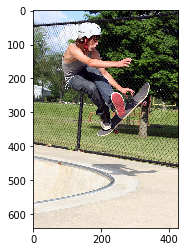

In [16]:
number = random.choice(range(0,5000))
filename_list = os.listdir(str(RAW_IMAGE_PATH / 'val'))
img_path = str(RAW_IMAGE_PATH / 'val' / filename_list[number])
max_length = 49
tokenizer = pickle.load(open("../resources/tokenizer.pkl","rb"))
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)
description = generate_desc(model, tokenizer, photo, max_length)
# description1 = generate_desc(model1, tokenizer, photo, max_length)
print("\n\n")
# print('Predict19: ', description1)
print('Predict: ', text_cleaning(description))
desc_list = []
for item in data['annotations']:
    image_id = item['image_id']
    image_name = '%012d' % (image_id) + '.jpg'
    if filename_list[number] == image_name:
        desc_list.append(item['caption'])

print('Original: ')
for desc in desc_list:
    print(desc)
    
plt.imshow(img)